In [1]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

In [59]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float64
uint8


In [60]:
def create_linechart(result_fit):
    # Generate a line chart of the training process
    history = result_fit.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [65]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

auroc_metric = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    multi_label=False,
)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.4554 - loss: 1.6674 - val_accuracy: 0.6905 - val_loss: 0.9515
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.6824 - loss: 0.9596 - val_accuracy: 0.7358 - val_loss: 0.8273
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7183 - loss: 0.8734 - val_accuracy: 0.7483 - val_loss: 0.7967
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.7327 - loss: 0.8286 - val_accuracy: 0.7607 - val_loss: 0.7656
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7443 - loss: 0.8043 - val_accuracy: 0.7772 - val_loss: 0.7386
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7580 - loss: 0.7903 - val_accuracy: 0.7900 - val_loss: 0.7086
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7760 - loss: 0.7502 - val_accuracy: 0.7960 - val_loss: 0.6883
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.7796 -

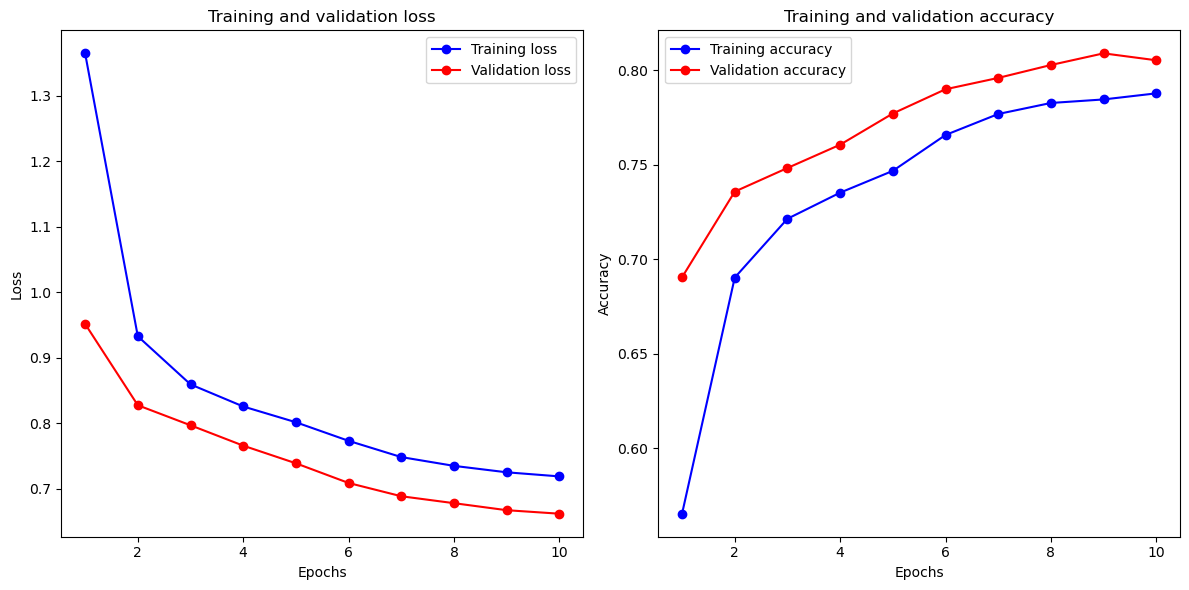

In [66]:
# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

### Configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 3 neuronen
1 output layer - 10 neuronen en softmax

Training nauwkeurigheid:  77.3 procent, Loss functie: 0.735
Test: Nauwkeurigheid: 77.3 procent, Loss functie 0.735

## Tweede poging configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 9 neuronen
1 output layer - 10 neuronen en softmax

In [67]:
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(9, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step - accuracy: 0.6916 - loss: 1.0037 - val_accuracy: 0.9150 - val_loss: 0.2895
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9026 - loss: 0.3363 - val_accuracy: 0.9258 - val_loss: 0.2657
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.9132 - loss: 0.3045 - val_accuracy: 0.9293 - val_loss: 0.2530
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9148 - loss: 0.2967 - val_accuracy: 0.9267 - val_loss: 0.2521
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9218 - loss: 0.2754 - val_accuracy: 0.9323 - val_loss: 0.2360
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9219 - loss: 0.2692 - val_accuracy: 0.9283 - val_loss: 0.2384
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9241 - loss: 0.2599 - val_accuracy: 0.9328 - val_loss: 0.2311
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9274 -

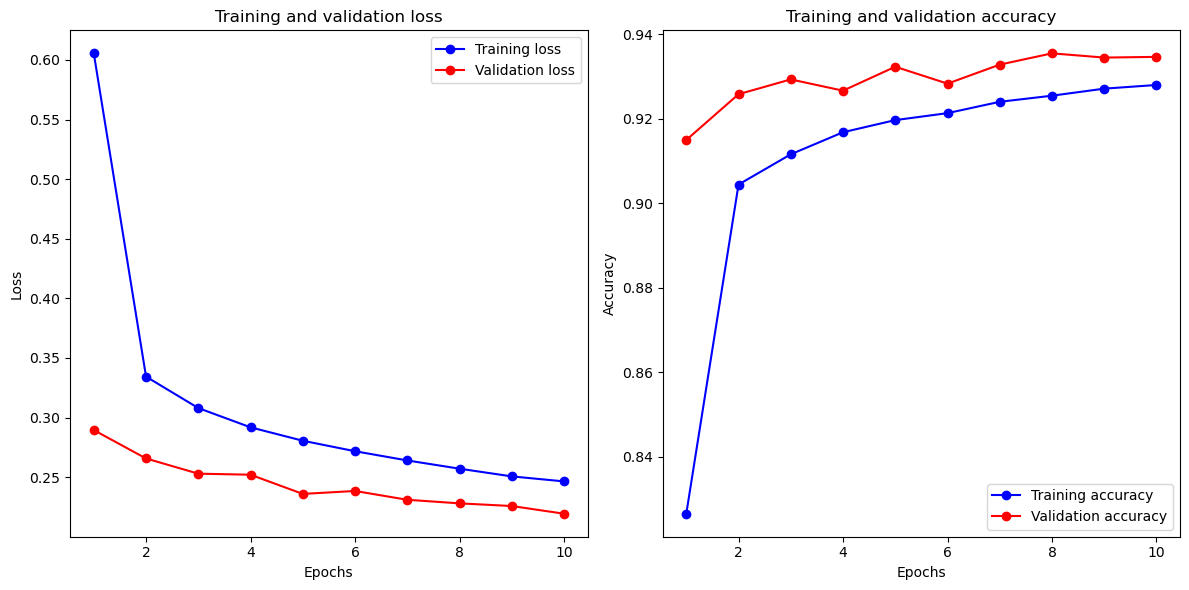

In [69]:
create_linechart(result_fit=result_fit)

### Resultaat:

Training: 92 procent, loss 0.27

Test: 92 procent, loss 0.27.

Conclusie, het aantal neuronen vergroten, zorgt voor een grotere nauwkeurigheid in ons model.

In [70]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8709 - loss: 0.4580 - val_accuracy: 0.9658 - val_loss: 0.1199
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9614 - loss: 0.1274 - val_accuracy: 0.9728 - val_loss: 0.0959
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9741 - loss: 0.0828 - val_accuracy: 0.9755 - val_loss: 0.0835
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0602 - val_accuracy: 0.9762 - val_loss: 0.0839
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9805 - val_loss: 0.0727
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0213 - 

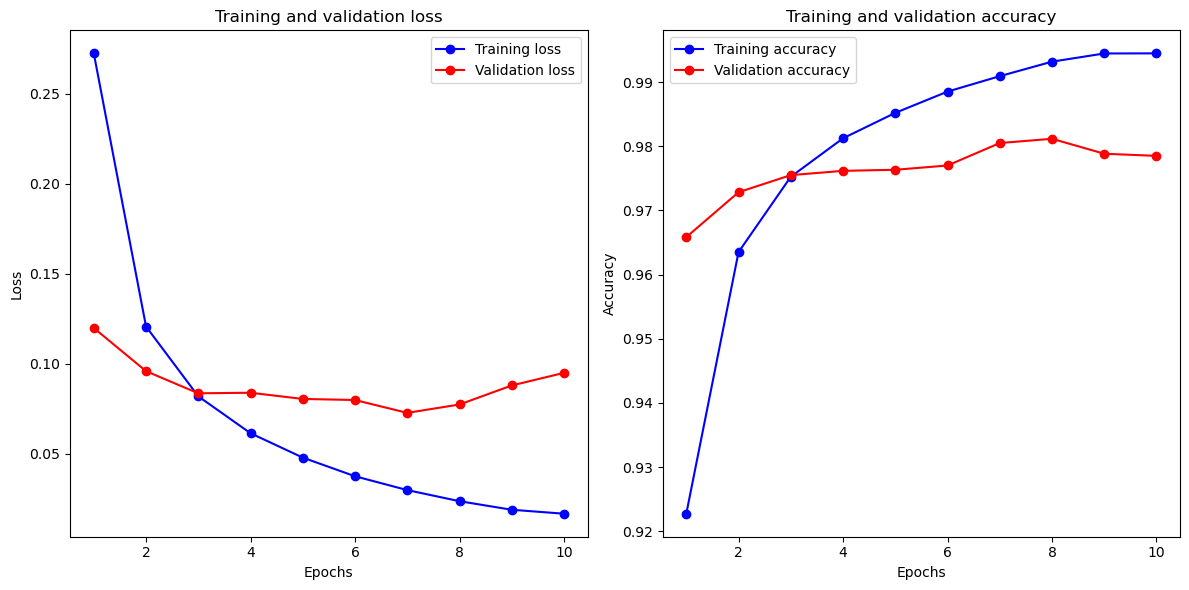

In [71]:
create_linechart(result_fit=result_fit)

Die nauwkeurigheid stijgt naar 97 procent als het aantal neuronen naar 128 omhoog gaat. Met een waarde verlies van 0.07

Er overfitting met een verschil van 1.2 procent verschil.

Vooral na een epoch rate van 3 wordt dit verschil groter.

Maatregelen om dit tegen te gaan:
- Kleinere dataset,
- Lagere epoch.

30000
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8360 - loss: 0.5701 - val_accuracy: 0.9430 - val_loss: 0.1839
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9567 - loss: 0.1400 - val_accuracy: 0.9573 - val_loss: 0.1362
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9736 - loss: 0.0865 - val_accuracy: 0.9680 - val_loss: 0.1150
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0566 - val_accuracy: 0.9643 - val_loss: 0.1192
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9880 - loss: 0.0407 - val_accuracy: 0.9623 - val_loss: 0.1249
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9680 - val_loss: 0.1106
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9901 - loss: 0.0288 - val_accuracy: 0.9670 - val_loss: 0.1185
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9938 - loss: 0.0205 - val_accura

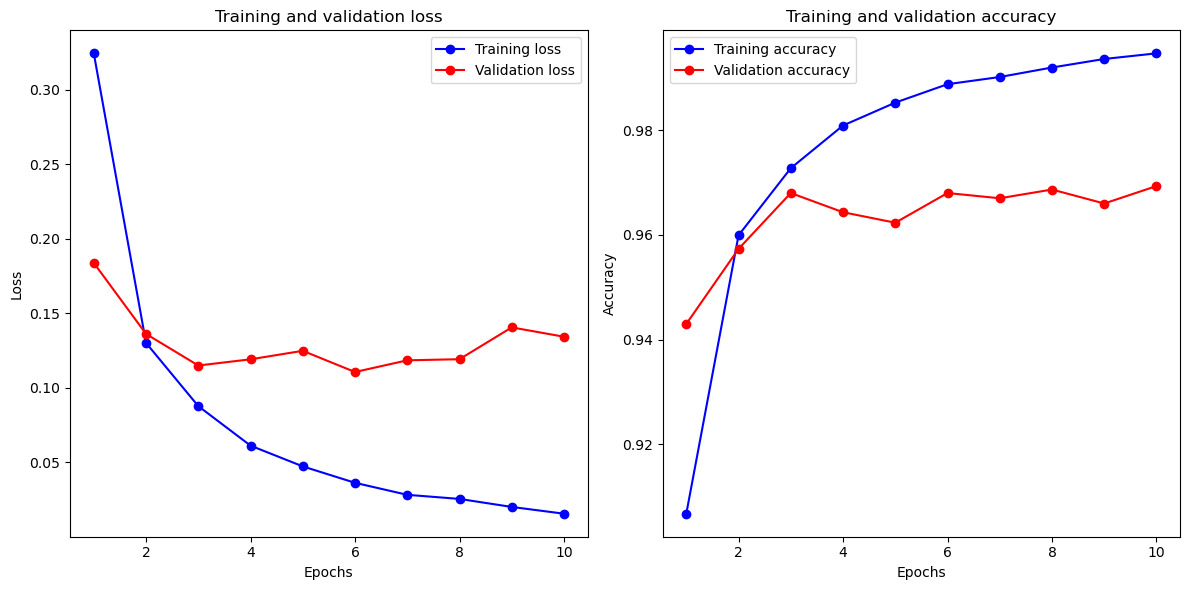

In [84]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()


#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_smaller_training_dataset = x_train[:30000]
y_smaller_training_dataset = y_train[:30000]
x_smaller_test_dataset = x_test
y_smaller_test_dataset = y_test

print(len(y_smaller_training_dataset))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_smaller_training_dataset, y_smaller_training_dataset, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_smaller_test_dataset, y_smaller_test_dataset, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

Conclusie:
Een kleinere dataset zorgt voor minder grotere nauwkeurigheid in ons model. Ten opzichte van testen met de oorspronkelijke grootte, 60000.

In [ ]:
## Poging met lagere epoch rate
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit)

## Poging met hogere learning rate

De learning rate is in deze poging van 0.005 naar 1.0 gezet.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.0993 - loss: 2.7992 - val_accuracy: 0.0915 - val_loss: 2.3701
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.0990 - loss: 2.4134 - val_accuracy: 0.0992 - val_loss: 2.4670
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.1026 - loss: 2.4117 - val_accuracy: 0.0995 - val_loss: 2.4067
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.1044 - loss: 2.4045 - val_accuracy: 0.0978 - val_loss: 2.4303
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.1014 - loss: 2.4007 - val_accuracy: 0.0915 - val_loss: 2.4411
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.1033 - loss: 2.4034 - val_accuracy: 0.1050 - val_loss: 2.3653
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.0993 - loss: 2.4029 - val_accuracy: 0.0960 - val_loss: 2.5904
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.1016 -

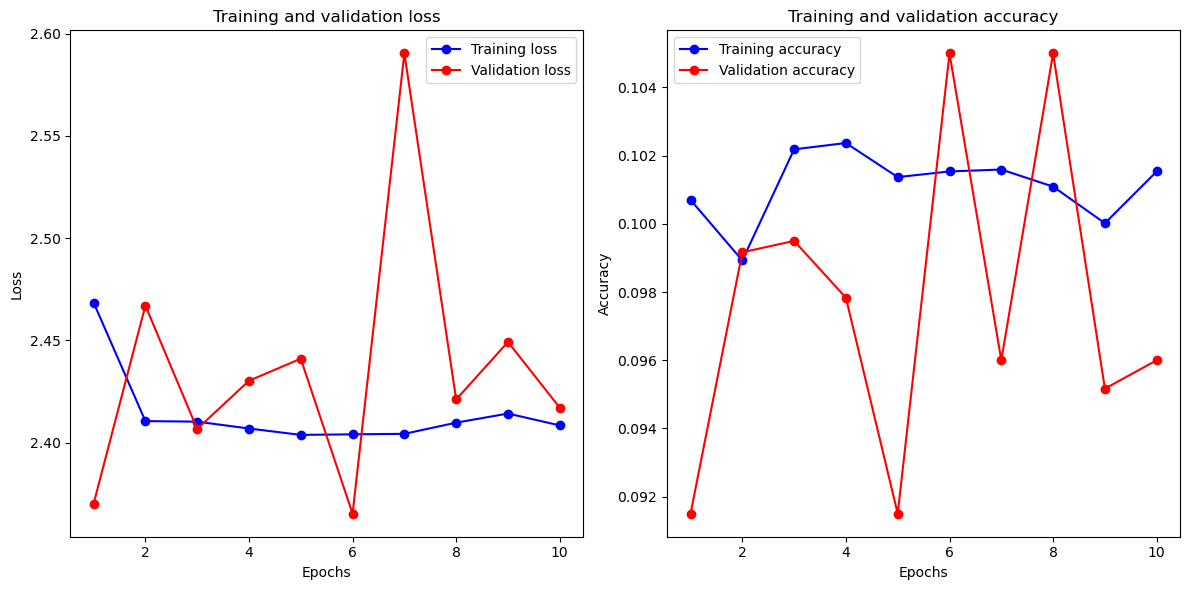

In [73]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.1032 - loss: 2.9586 - val_accuracy: 0.1050 - val_loss: 2.4017
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.0994 - loss: 2.4174 - val_accuracy: 0.1000 - val_loss: 2.3698
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.1059 - loss: 2.4082 - val_accuracy: 0.0952 - val_loss: 2.4195
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.1011 - loss: 2.4163 - val_accuracy: 0.0992 - val_loss: 2.4481
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.1006 - loss: 2.4101 - val_accuracy: 0.1113 - val_loss: 2.4116
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.1014 - loss: 2.4154 - val_accuracy: 0.0992 - val_loss: 2.3912
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.1019 - loss: 2.4058 - val_accuracy: 0.1050 - val_loss: 2.4438
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.0990 -

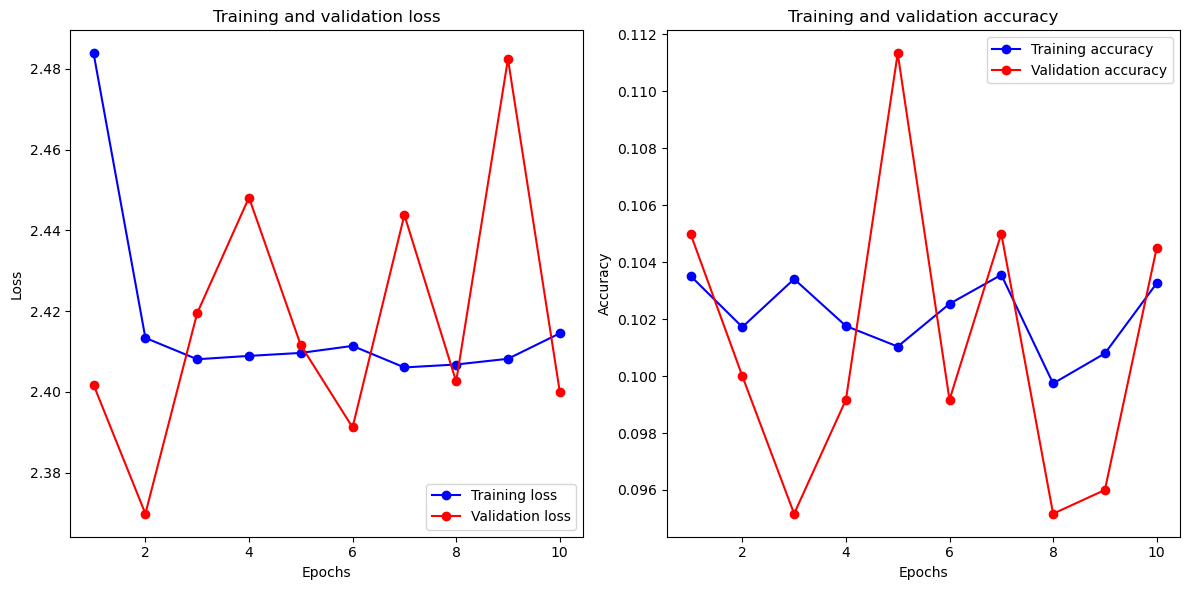

In [74]:
# My version met extra layers
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

### Conclusie:

Een hogere learning rate leidt tot lagere nauwkeurigheid van het model. Dit leidt ook tot grotere value loss waarden

Dit kan ook niet opgelost worden door extra layers toe te voegen.